In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos do seaborn
sns.set_style('whitegrid')

# Carregando o dataset do Titanic diretamente do Seaborn
df_titanic = sns.load_dataset('titanic')

# Exibindo as 5 primeiras linhas para confirmar que carregou
print(df_titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [2]:
# Mostra as 5 primeiras linhas do nosso dataframe
print("As 5 primeiras linhas dos dados:")
print(df_titanic.head())

print("\n-----------------------------------\n")

# Mostra informações sobre cada coluna: tipo de dado e quantidade de valores não-nulos
print("Informações gerais do dataset:")
df_titanic.info()

As 5 primeiras linhas dos dados:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

-----------------------------------

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column 

In [4]:
# --- CÓDIGO CORRIGIDO PARA O PASSO 3 ---

# Calculando a mediana da idade
mediana_idade = df_titanic['age'].median()
print(f"A mediana das idades é: {mediana_idade:.2f} anos")

# Preenchendo os valores de idade faltantes (Maneira Moderna e Recomendada)
# A linha abaixo substitui a antiga que usava inplace=True
df_titanic['age'] = df_titanic['age'].fillna(mediana_idade)

# Verificando se ainda existem valores nulos na coluna 'age'
print("\nInformações após preencher os dados de idade:")
df_titanic.info()

A mediana das idades é: 28.00 anos

Informações após preencher os dados de idade:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ 

In [5]:
# Calcular Média
media_idade = df_titanic['age'].mean()

# Calcular Mediana (já fizemos, mas vamos registrar)
mediana_idade = df_titanic['age'].median()

# Calcular Moda (a idade que mais aparece)
# .mode() retorna uma série, pegamos o primeiro valor com [0]
moda_idade = df_titanic['age'].mode()[0]

print(f"Média de Idade: {media_idade:.2f} anos")
print(f"Mediana de Idade: {mediana_idade:.2f} anos")
print(f"Moda de Idade: {moda_idade:.2f} anos")

Média de Idade: 29.36 anos
Mediana de Idade: 28.00 anos
Moda de Idade: 28.00 anos


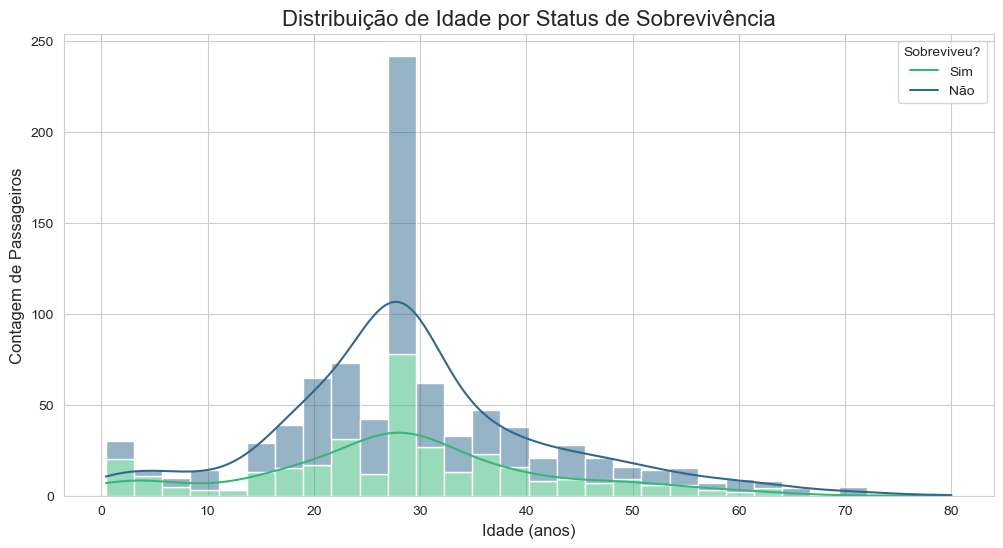

In [6]:
# Criando uma figura e um eixo para o gráfico
plt.figure(figsize=(12, 6))

# Histograma da idade para quem sobreviveu (survived=1) e quem não sobreviveu (survived=0)
sns.histplot(data=df_titanic, x='age', hue='survived', multiple='stack', kde=True, palette='viridis')

# Adicionando títulos e legendas
plt.title('Distribuição de Idade por Status de Sobrevivência', fontsize=16)
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Contagem de Passageiros', fontsize=12)
plt.legend(title='Sobreviveu?', labels=['Sim', 'Não'])

# Mostrando o gráfico
plt.show()

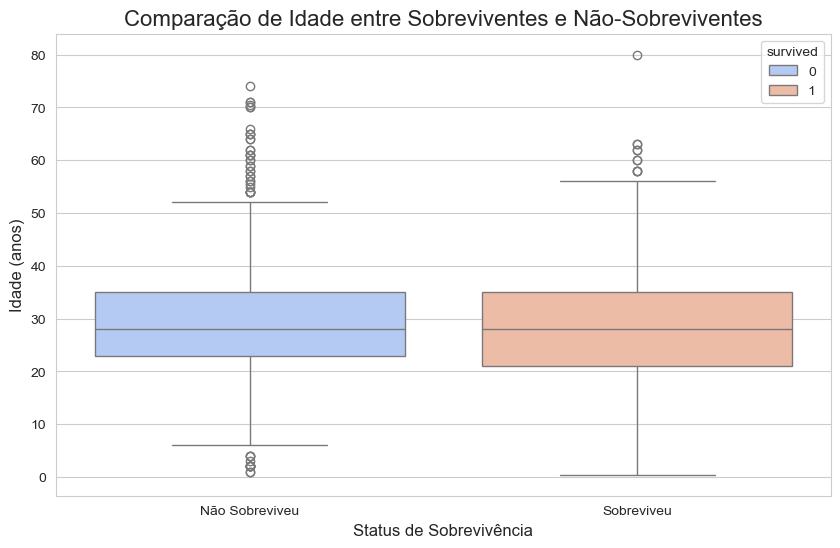

In [8]:
# --- CÓDIGO CORRIGIDO PARA O PASSO 5 (Boxplot) ---

# Criando uma figura e um eixo para o gráfico
plt.figure(figsize=(10, 6))

# Boxplot (Maneira Moderna e Recomendada)
# Adicionamos hue='survived' para sermos explícitos sobre o que colorir
sns.boxplot(data=df_titanic, x='survived', y='age', hue='survived', palette='coolwarm')

# Adicionando títulos e mudando os rótulos do eixo x
plt.title('Comparação de Idade entre Sobreviventes e Não-Sobreviventes', fontsize=16)
plt.xlabel('Status de Sobrevivência', fontsize=12)
plt.ylabel('Idade (anos)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Não Sobreviveu', 'Sobreviveu'])

# Mostrando o gráfico
plt.show()